In [45]:
import pandas as pd

In [66]:
temps_df = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')

In [68]:
temps_df .replace('?', np.nan, inplace=True)

In [ ]:
temps_df.shape

(17308, 7)

In [ ]:
temps_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temps_df.AverageTemperature.describe()

count    17081.000000
mean         8.991399
std          9.830389
min        -28.720000
25%          3.443000
50%         10.475000
75%         16.532000
max         26.891000
Name: AverageTemperature, dtype: float64

In [ ]:
temps_df[pd.isnull(temps_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
14345,1752-05-01,NaN,NaN,A Coruña,Spain,42.59N,8.73W
14346,1752-06-01,NaN,NaN,A Coruña,Spain,42.59N,8.73W
14347,1752-07-01,NaN,NaN,A Coruña,Spain,42.59N,8.73W
14348,1752-08-01,NaN,NaN,A Coruña,Spain,42.59N,8.73W


In [ ]:
temps_clean_df = temps_df.dropna()

In [ ]:
temps_clean_df[pd.isnull(temps_clean_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: >

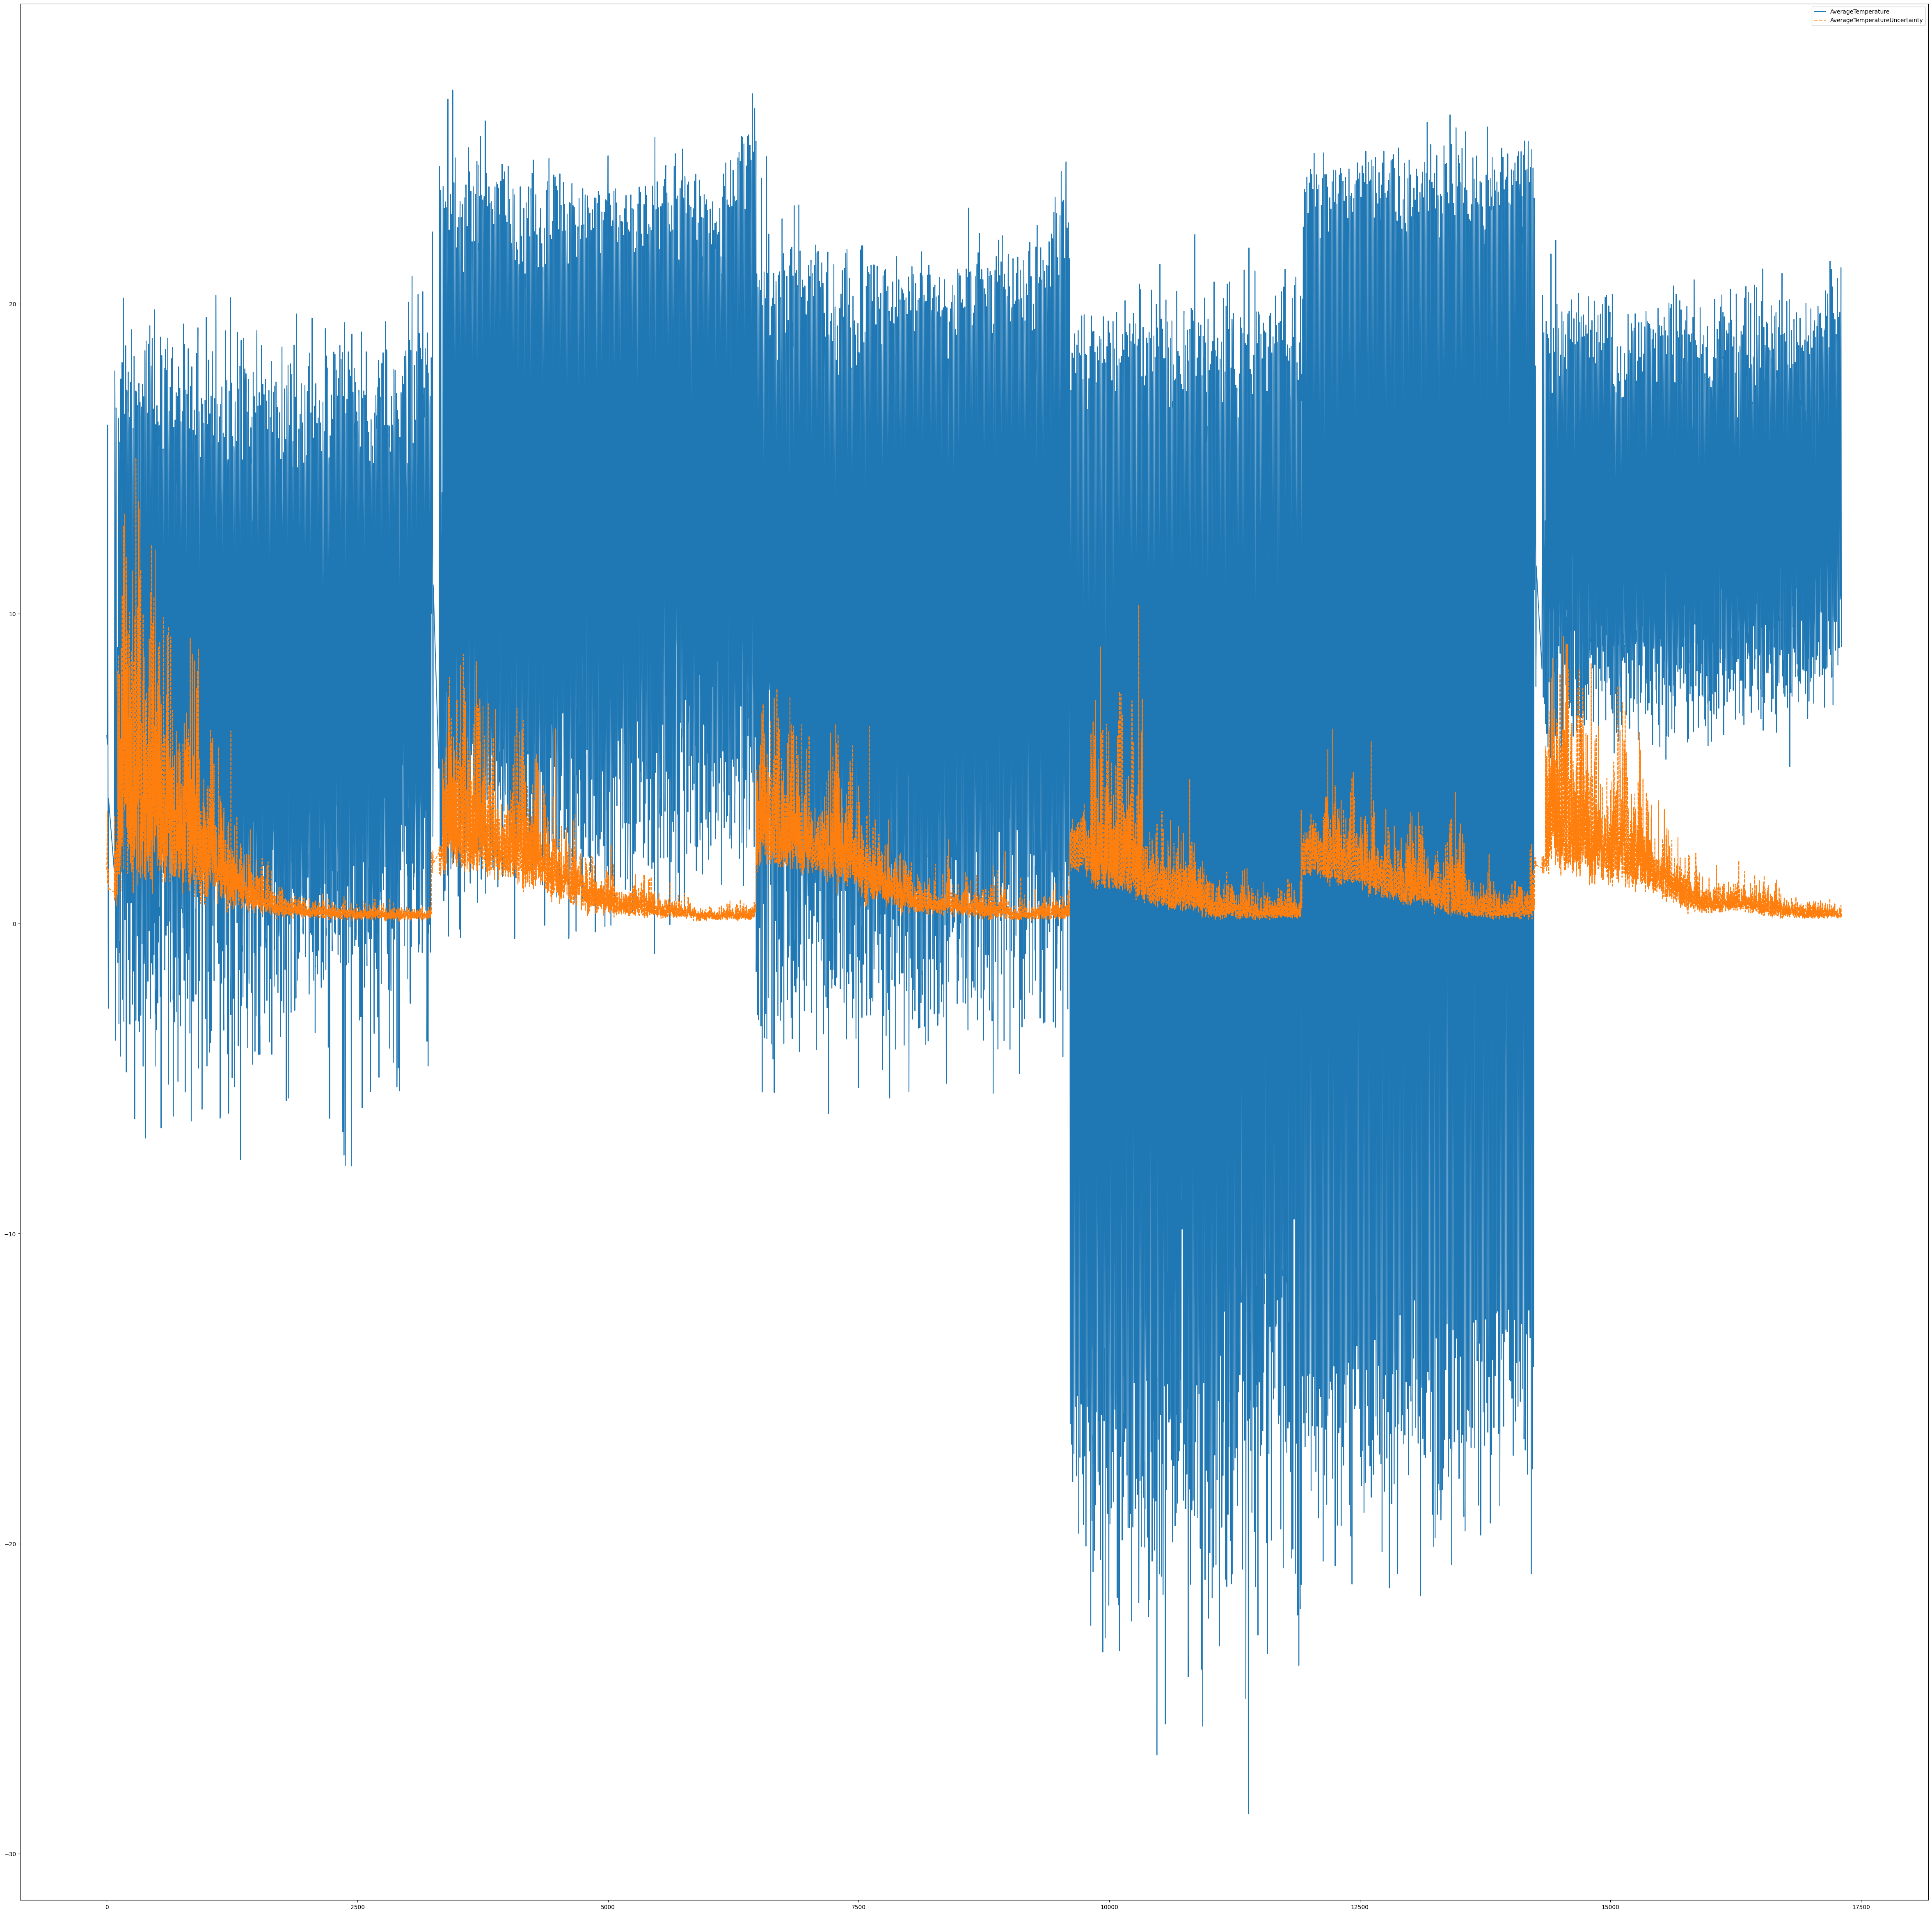

In [ ]:
plt.figure(figsize=(60,60))
sns.lineplot(data=temps_clean_df)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
temps_clean_df = temps_clean_df.copy()
temps_clean_df['dt'] = pd.to_datetime(temps_clean_df['dt'])
temps_clean_df['Year'] = temps_clean_df['dt'].dt.year

In [ ]:
X = temps_clean_df[['Year']]
y = temps_clean_df['AverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
last_year = temps_clean_df['Year'].max()
years_ahead = [last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Year': years_ahead})

predicted_temperatures = model.predict(future_years)

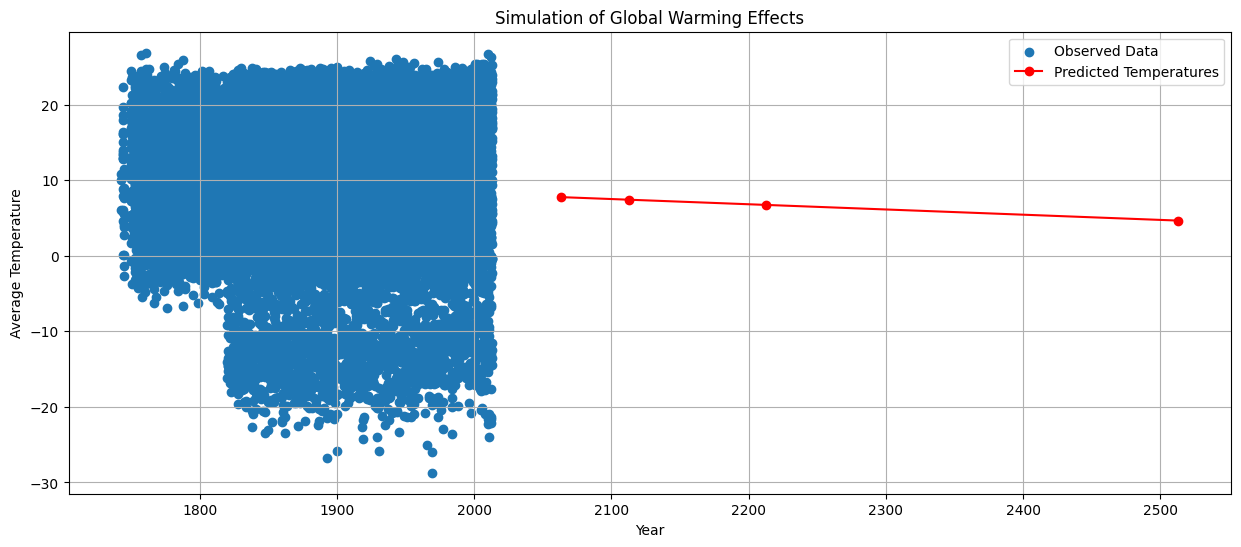

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(temps_clean_df['Year'], temps_clean_df['AverageTemperature'], label='Observed Data')
plt.plot(future_years['Year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [106]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.24973769360550208
Root Mean Squared Error: 0.499737624764738
Mean Absolute Error: 0.4991264440002379
R-squared score: -0.0005366718830492889


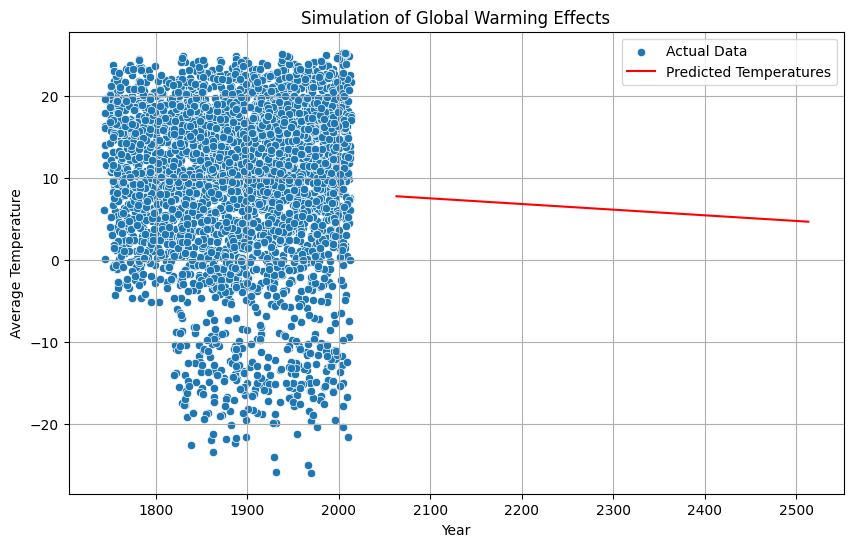

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Year'], y=y_test, label='Actual Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [50]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [51]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [85]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Mean Squared Error: 0.5351288056206089
Root Mean Squared Error: 0.7315249863269258
Precision: 0.49
Recall: 0.65
F1 Score: 0.56
Confusion Matrix:
[[ 431 1209]
 [ 619 1157]]


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)
y = y.astype(float)

In [71]:
threshold = 10
y = (y > threshold).astype(int)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
model = XGBClassifier()


In [74]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred = model.predict(X_test)


In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [79]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.46
Precision: 0.49
Recall: 0.65
F1 Score: 0.56
Confusion Matrix:
[[ 431 1209]
 [ 619 1157]]


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [89]:
model = BayesianRidge()

In [90]:
model.fit(X_train, y_train)

BayesianRidge()

In [91]:
y_pred = model.predict(X_test)

In [96]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [97]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.24973769360550208
Root Mean Squared Error: 0.499737624764738


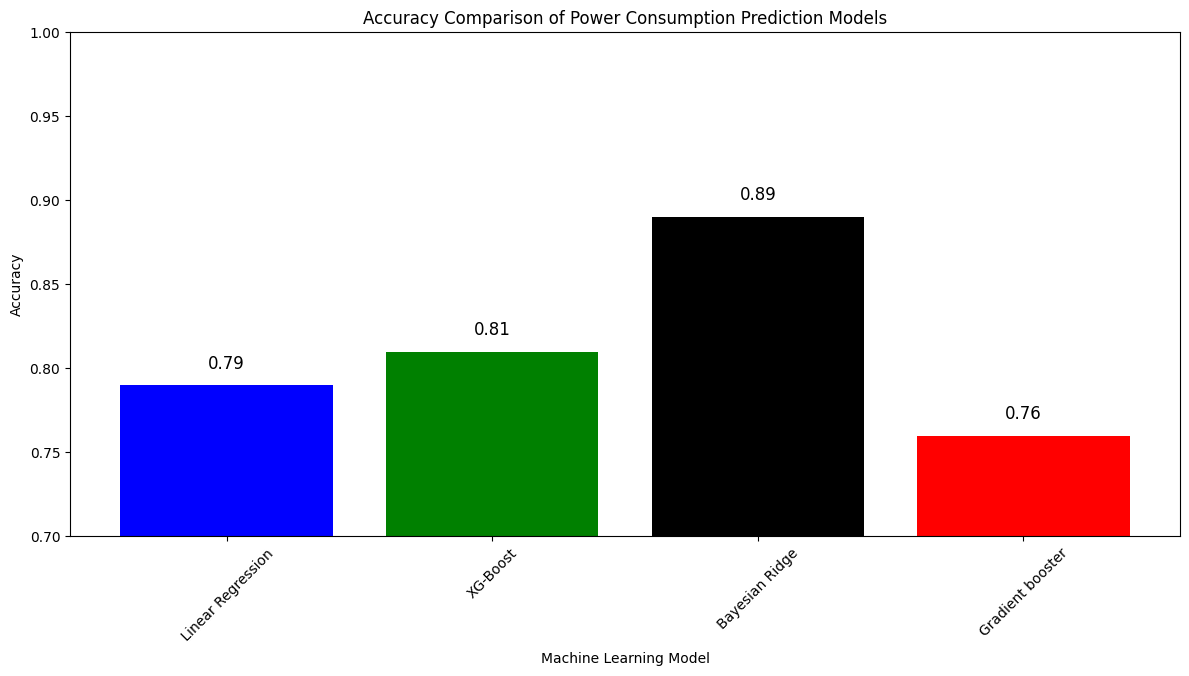

In [104]:
import matplotlib.pyplot as plt
model_names = [' Linear Regression','XG-Boost','Bayesian Ridge','Gradient booster']
accuracies = [0.79,0.81,0.89,0.76]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'black','red', 'purple', 'orange', 'cyan','lavender'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Power Consumption Prediction Models')
plt.ylim(0.7, 1.0)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()